In [1]:
import os

import warnings 
warnings.filterwarnings('ignore')


# for data analytics
import pandas as pd
import numpy as np
from collections import Counter

# for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# for data preparation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# imblean provides tools for us to deal with imbalanced class sizes
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN

# # For entropy computation
# from pyitlib import discrete_random_variable as drv

from scipy import stats
import missingno
from sklearn import preprocessing

# TEXT EDA
# from wordcloud import WordCloud

# import spacy
# from spacy.lang.en.stop_words import STOP_WORDS
# from spacy.lang.en import English

import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 100
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set()
import ast

In [2]:
def read_file():
    full_data = pd.DataFrame()
    for file in os.listdir():
        if 'compiled' in file:
            data = pd.read_csv(file, index_col = 0)
            full_data = full_data.append(data)
    return full_data

In [3]:
data = read_file()

In [4]:
data = data.drop_duplicates()

## General counts

In [5]:
data

,url,name,neighbourhood,price,categories,review,user,date
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm
3,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nClassic BBQ wings\nJuicy and tasty like it’s...,Ally Tan,Jul 30 at 4:09pm
4,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nBBQ stingray\nIt was yummy but slight warnin...,Ally Tan,Jul 30 at 4:08pm
...,...,...,...,...,...,...,...,...
14,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box D $13.80\n川椒雞柳 | 鮮腐竹蝦球 | 清炒西蘭花 | ...,K T,"Oct 27, 2020"
15,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box C $11.80\n普寧豆醬走地雞 | 鮮菌翡翠豆腐 | 蒜茸炒四...,K T,"Oct 26, 2020"
16,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box B $11.80\n蒜子豆豉凉瓜黑豬梅肉 | 香菌扒豆腐 | 蒜茸...,K T,"Oct 9, 2020"
17,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\n潮州糜 Bento A $12.80\n鹵鴨拼豆干 | 川椒雞 | 欖菜四季苗| 菜脯...,K T,"Oct 1, 2020"


In [6]:
# Total Number of restaurant reviews
print(f'No. reviews: {len(data)}')
# Number of restaurants with reviews
num = len(data['url'].unique())
print(f'No. restaurants: {num}')

No. reviews: 28731
No. restaurants: 863


## Clean Cost Column 

In [7]:
data['cleaned_price'] = data['price'].apply(lambda x: int(x.split('/')[0].replace('~$','')) if '$' in x else np.nan)
data.head(3)

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm,5.0
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm,5.0


## Clean Categories

In [8]:
category_mapping = {'Steak':['Western'], 
 'Cocktails':['Alcohol','Drinks'], 
 'Great View': ['Good Environment'], 
 'Sushi':['Japanese'], 
 'Ramen':['Japanese','Noodles'], 
 'Islandwide Delivery':['Delivery'], 
 'Craft Beer':['Drinks','Alcohol'], 
 '1 For 1 Deals':['Value'],
 'Teppanyaki':['Japanese'], 
 'Sustainable Dining on Beyond':['Sustainable'], 
 'Vegan friendly':['Sustainable'], 
 'Kopitiam':['Local Delights'], 
 'Char Kway Teow':['Local Delights','Noodles','Chinese'], 
 'Taiwanese':['Chinese'], 
 'Waffles':['Desserts'], 
 'Zi Char':['Local Delights','Chinese'], 
 'Fruit Tea':['Drinks'], 
 'Pasta':['Western','Noodles'], 
 'Vouchers':['Value'], 
 'Chirashi':['Japanese'], 
 'Bars':['Alcohol','Drinks'], 
 'Burpple Beyond Deals 💰':['Value'], 
 'BITES':['Bites'],
 'Burpple Guides':['Recommended'],
 'Michelin Guide Singapore 2018':['Recommended'],
'Grill & BBQ':['Western','BBQ'], 
'Bread & Pastries':['Desserts','High Tea', 'Breakfast & Brunch'], 
 'Vegetarian friendly':['Sustainable'], 
 'Cheap & Good':['Value'], 
 'Mediterranean':['Middle Eastern'], 
 'Michelin Guide Singapore 2017':['Recommended'], 
 'Hawker Food':['Local Delights'], 
 'Ice Cream & Yoghurt':['Desserts'], 
 'Cafes & Coffee':['Desserts','High Tea', 'Breakfast & Brunch'], 
 'Interesting':['Good Environment'],
'Dinner with Drinks':['Drinks'], 
'Bak Kut Teh':['Local Delights', 'Chinese'],
'Burgers':['Western'],
'Korean Desserts': ['Desserts','Korean'],
 'Vegetarian':['Sustainable'], 
 'Nasi Lemak':['Malay','Local Delights'], 
 'Salads':['Western'], 
'TAKEAWAY OPTION':['Convenient'],
'Delivery':['Convenient'], 
'Sandwiches':['High Tea', 'Breakfast & Brunch', 'Western'], 
'Pizza':['Western'],
'Vegan':['Sustainable'], 
'Dim Sum':['Chinese'], 
'Chicken Rice':['Local Delights','Chinese'], 
'Fried Chicken':['Korean', 'Western', 'Bites','Fast Food'], 
'Korean BBQ':['Korean','BBQ'],
'Filipino Local Delights':['Filipino'], 
'Cakes':['Desserts','High Tea'], 
'Michelin Guide Singapore 2019':['Recommended'],
 'Korean Fried Chicken':['Korean','Bites','Fast Food'], 
'Hot Pot': ['Chinese', 'Rainy Day Comforts'], 
'Late Night':['Supper'],
 'Bubble Tea':['Drinks'],
 'BEYOND': ['Recommended', 'Value']
 }

In [9]:
# find unique categories 
def find_unique_categories(category_col_name, data):
    all_categories = []
    for categories in data[category_col_name]:
        try:
            all_categories.extend(ast.literal_eval(categories))
        except:
            all_categories.extend(categories)
    print(f'Num of Categories:{len(set(all_categories))}')
    for i in set(all_categories):
        print(i)
    return list(set(all_categories))
    

In [10]:
find_unique_categories('categories', data)

Num of Categories:101
Dim Sum
Bars
Sandwiches
Thai
Burgers
Filipino Local Delights
Cocktails
Pet-Friendly
Hawker Food
Dinner with Drinks
Interesting
1 For 1 Deals
Steak
Hot Pot
Zi Char
Middle Eastern
Taiwanese
Newly Opened
Bites
Ice Cream & Yoghurt
Great View
High Tea
Burpple Guides
Kid Friendly
Hidden Gem
Nasi Lemak
Char Kway Teow
Korean Fried Chicken
Peranakan
Greek
Pizza
Fruit Tea
Russian
Pasta
Mexican
Spanish
Bak Kut Teh
Grill & BBQ
Bubble Tea
Korean
Japanese
Vegan friendly
Salads
TAKEAWAY OPTION
Fine Dining
Turkish
Michelin Guide Singapore 2019
Vegan
BITES
Buffets
Western
Breakfast & Brunch
Indian
Islandwide Delivery
Ramen
BEYOND
Halal
Noodles
Malay
Mediterranean
French
Vouchers
Healthy
Local Delights
Late Night
Date Night
Rainy Day Comforts
Argentinian
Sustainable Dining on Beyond
Seafood
Chinese
Cheap & Good
Burpple Beyond Deals 💰
Fried Chicken
Supper
Vegetarian friendly
Teppanyaki
European
Korean BBQ
Cafes & Coffee
Cakes
Fast Food
Vietnamese
Chirashi
Delivery
Michelin Guide Sin

['Dim Sum',
 'Bars',
 'Sandwiches',
 'Thai',
 'Burgers',
 'Filipino Local Delights',
 'Cocktails',
 'Pet-Friendly',
 'Hawker Food',
 'Dinner with Drinks',
 'Interesting',
 '1 For 1 Deals',
 'Steak',
 'Hot Pot',
 'Zi Char',
 'Middle Eastern',
 'Taiwanese',
 'Newly Opened',
 'Bites',
 'Ice Cream & Yoghurt',
 'Great View',
 'High Tea',
 'Burpple Guides',
 'Kid Friendly',
 'Hidden Gem',
 'Nasi Lemak',
 'Char Kway Teow',
 'Korean Fried Chicken',
 'Peranakan',
 'Greek',
 'Pizza',
 'Fruit Tea',
 'Russian',
 'Pasta',
 'Mexican',
 'Spanish',
 'Bak Kut Teh',
 'Grill & BBQ',
 'Bubble Tea',
 'Korean',
 'Japanese',
 'Vegan friendly',
 'Salads',
 'TAKEAWAY OPTION',
 'Fine Dining',
 'Turkish',
 'Michelin Guide Singapore 2019',
 'Vegan',
 'BITES',
 'Buffets',
 'Western',
 'Breakfast & Brunch',
 'Indian',
 'Islandwide Delivery',
 'Ramen',
 'BEYOND',
 'Halal',
 'Noodles',
 'Malay',
 'Mediterranean',
 'French',
 'Vouchers',
 'Healthy',
 'Local Delights',
 'Late Night',
 'Date Night',
 'Rainy Day Comforts

In [11]:
# map categories
all_new_categories = []
for idx, row in data.iterrows():
    categories = ast.literal_eval(row['categories'])
    new_categories = []
    for category in categories:
        if category in category_mapping.keys():
            new_categories.extend(category_mapping[category])
        else:
            new_categories.append(category)
    all_new_categories.append(new_categories)

data['cleaned_categories'] = all_new_categories

In [12]:
# find unique categories after mapping
list_cleaned_categories = find_unique_categories('cleaned_categories', data)

Num of Categories:51
Kid Friendly
Hidden Gem
Supper
Recommended
European
Value
Fast Food
Peranakan
Fine Dining
Thai
Vietnamese
Turkish
Greek
Pet-Friendly
Delivery
BBQ
Buffets
Alcohol
Western
Indonesian
Breakfast & Brunch
Indian
Good Environment
Russian
Halal
Noodles
Malay
Sustainable
French
Convenient
Healthy
Mexican
Drinks
Middle Eastern
Soup
Spanish
Local Delights
Date Night
Rainy Day Comforts
Filipino
Newly Opened
Bites
Argentinian
Good For Groups
Korean
Japanese
Seafood
High Tea
Chinese
Italian
Desserts


## Check for null values

In [13]:
# Check if there is any null value
data.isna().apply(pd.value_counts)

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,cleaned_categories
False,28731.0,28731.0,28708,28731.0,28731.0,28731.0,28731.0,28731.0,28302,28731.0
True,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN,429,NaN


In [14]:
# 89 reviews have no neighbourhood. Thus, we drop these reviews.
cleaned_data = data[~data['neighbourhood'].isna()]

# 1781 reviews have no price. Thus, we drop these reviews.
cleaned_data = data[~data['cleaned_price'].isna()]

In [15]:
# Total Number of restaurant reviews
print(f'No. reviews: {len(cleaned_data)}')
# Number of restaurants with reviews
num = len(cleaned_data['url'].unique())
print(f'No. restaurants: {num}')

No. reviews: 28302
No. restaurants: 845


## Convert Cat Variables to Binary Variables

In [16]:
list_cleaned_categories = find_unique_categories('cleaned_categories', cleaned_data)
list_cleaned_categories

Num of Categories:51
Kid Friendly
Hidden Gem
Supper
Recommended
European
Value
Fast Food
Peranakan
Fine Dining
Thai
Vietnamese
Turkish
Greek
Pet-Friendly
Delivery
BBQ
Buffets
Alcohol
Western
Indonesian
Breakfast & Brunch
Indian
Good Environment
Russian
Halal
Noodles
Malay
Sustainable
French
Convenient
Healthy
Mexican
Drinks
Middle Eastern
Soup
Spanish
Local Delights
Date Night
Rainy Day Comforts
Filipino
Newly Opened
Bites
Argentinian
Good For Groups
Korean
Japanese
Seafood
High Tea
Chinese
Italian
Desserts


['Kid Friendly',
 'Hidden Gem',
 'Supper',
 'Recommended',
 'European',
 'Value',
 'Fast Food',
 'Peranakan',
 'Fine Dining',
 'Thai',
 'Vietnamese',
 'Turkish',
 'Greek',
 'Pet-Friendly',
 'Delivery',
 'BBQ',
 'Buffets',
 'Alcohol',
 'Western',
 'Indonesian',
 'Breakfast & Brunch',
 'Indian',
 'Good Environment',
 'Russian',
 'Halal',
 'Noodles',
 'Malay',
 'Sustainable',
 'French',
 'Convenient',
 'Healthy',
 'Mexican',
 'Drinks',
 'Middle Eastern',
 'Soup',
 'Spanish',
 'Local Delights',
 'Date Night',
 'Rainy Day Comforts',
 'Filipino',
 'Newly Opened',
 'Bites',
 'Argentinian',
 'Good For Groups',
 'Korean',
 'Japanese',
 'Seafood',
 'High Tea',
 'Chinese',
 'Italian',
 'Desserts']

In [17]:
# append empty columns with category names
cleaned_data = cleaned_data.reindex(cleaned_data.columns.tolist() + list_cleaned_categories, axis=1)

In [18]:
for category in list_cleaned_categories:
    print(category)
    cleaned_data[category] = cleaned_data['cleaned_categories'].apply(lambda x: 1 if category in x else 0)

Kid Friendly
Hidden Gem
Supper
Recommended
European
Value
Fast Food
Peranakan
Fine Dining
Thai
Vietnamese
Turkish
Greek
Pet-Friendly
Delivery
BBQ
Buffets
Alcohol
Western
Indonesian
Breakfast & Brunch
Indian
Good Environment
Russian
Halal
Noodles
Malay
Sustainable
French
Convenient
Healthy
Mexican
Drinks
Middle Eastern
Soup
Spanish
Local Delights
Date Night
Rainy Day Comforts
Filipino
Newly Opened
Bites
Argentinian
Good For Groups
Korean
Japanese
Seafood
High Tea
Chinese
Italian
Desserts


## Mapping Neighbourhoods to Regions

In [19]:
neighbourhood_to_region_mapping = pd.read_excel('neighbourhood_to_region_mapping.xlsx')
neighbourhood_to_region_mapping['neighbourhood'] = neighbourhood_to_region_mapping['neighbourhood'].apply(lambda x: x.replace('\xa0',''))
neighbourhood_to_region_mapping = neighbourhood_to_region_mapping.set_index('neighbourhood').T.to_dict('records')[0]

In [20]:
cleaned_data['region'] = cleaned_data['neighbourhood'].apply(lambda x: neighbourhood_to_region_mapping[x])

In [21]:
cleaned_data

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,cleaned_categories,...,Argentinian,Good For Groups,Korean,Japanese,Seafood,High Tea,Chinese,Italian,Desserts,region
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
3,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nClassic BBQ wings\nJuicy and tasty like it’s...,Ally Tan,Jul 30 at 4:09pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
4,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nBBQ stingray\nIt was yummy but slight warnin...,Ally Tan,Jul 30 at 4:08pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box D $13.80\n川椒雞柳 | 鮮腐竹蝦球 | 清炒西蘭花 | ...,K T,"Oct 27, 2020",50.0,"[Chinese, Good For Groups]",...,0,1,0,0,0,0,1,0,0,Central
15,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box C $11.80\n普寧豆醬走地雞 | 鮮菌翡翠豆腐 | 蒜茸炒四...,K T,"Oct 26, 2020",50.0,"[Chinese, Good For Groups]",...,0,1,0,0,0,0,1,0,0,Central
16,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box B $11.80\n蒜子豆豉凉瓜黑豬梅肉 | 香菌扒豆腐 | 蒜茸...,K T,"Oct 9, 2020",50.0,"[Chinese, Good For Groups]",...,0,1,0,0,0,0,1,0,0,Central
17,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\n潮州糜 Bento A $12.80\n鹵鴨拼豆干 | 川椒雞 | 欖菜四季苗| 菜脯...,K T,"Oct 1, 2020",50.0,"[Chinese, Good For Groups]",...,0,1,0,0,0,0,1,0,0,Central


In [22]:
cleaned_data.to_csv('cleaned_restaurant_reviews.csv')

## Categorical EDA

In [23]:
cleaned_data

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,cleaned_categories,...,Argentinian,Good For Groups,Korean,Japanese,Seafood,High Tea,Chinese,Italian,Desserts,region
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
3,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nClassic BBQ wings\nJuicy and tasty like it’s...,Ally Tan,Jul 30 at 4:09pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
4,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nBBQ stingray\nIt was yummy but slight warnin...,Ally Tan,Jul 30 at 4:08pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box D $13.80\n川椒雞柳 | 鮮腐竹蝦球 | 清炒西蘭花 | ...,K T,"Oct 27, 2020",50.0,"[Chinese, Good For Groups]",...,0,1,0,0,0,0,1,0,0,Central
15,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box C $11.80\n普寧豆醬走地雞 | 鮮菌翡翠豆腐 | 蒜茸炒四...,K T,"Oct 26, 2020",50.0,"[Chinese, Good For Groups]",...,0,1,0,0,0,0,1,0,0,Central
16,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box B $11.80\n蒜子豆豉凉瓜黑豬梅肉 | 香菌扒豆腐 | 蒜茸...,K T,"Oct 9, 2020",50.0,"[Chinese, Good For Groups]",...,0,1,0,0,0,0,1,0,0,Central
17,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\n潮州糜 Bento A $12.80\n鹵鴨拼豆干 | 川椒雞 | 欖菜四季苗| 菜脯...,K T,"Oct 1, 2020",50.0,"[Chinese, Good For Groups]",...,0,1,0,0,0,0,1,0,0,Central


Pie Chart of restaurants/reviews by neighbourhood - if got too many cats we do bar chart DONE
Bar chart by restaurants/reviews by category (might not sum to 100 bc 1 restaurant can be in multiple categories) DONE
Histogram of number of reviews for each restaurant -> 10-20 reviews (10 rest), 20-30 reviews (20 rest) DONE
Box and whiskers plot for price data DONE
Normal distribution chart for price data 
Number of reviews per date

#### Bar Chart of Restaurants by Neighbourhood

In [24]:
num_rest_by_neighbourhood_East = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'East'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')
num_rest_by_neighbourhood_Central = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'Central'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')
num_rest_by_neighbourhood_West = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'West'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')
num_rest_by_neighbourhood_NE = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'North East'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')
num_rest_by_neighbourhood_North = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'North'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')
num_rest_by_neighbourhood_South = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'South'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')

Text(0.5, 1.0, 'South')

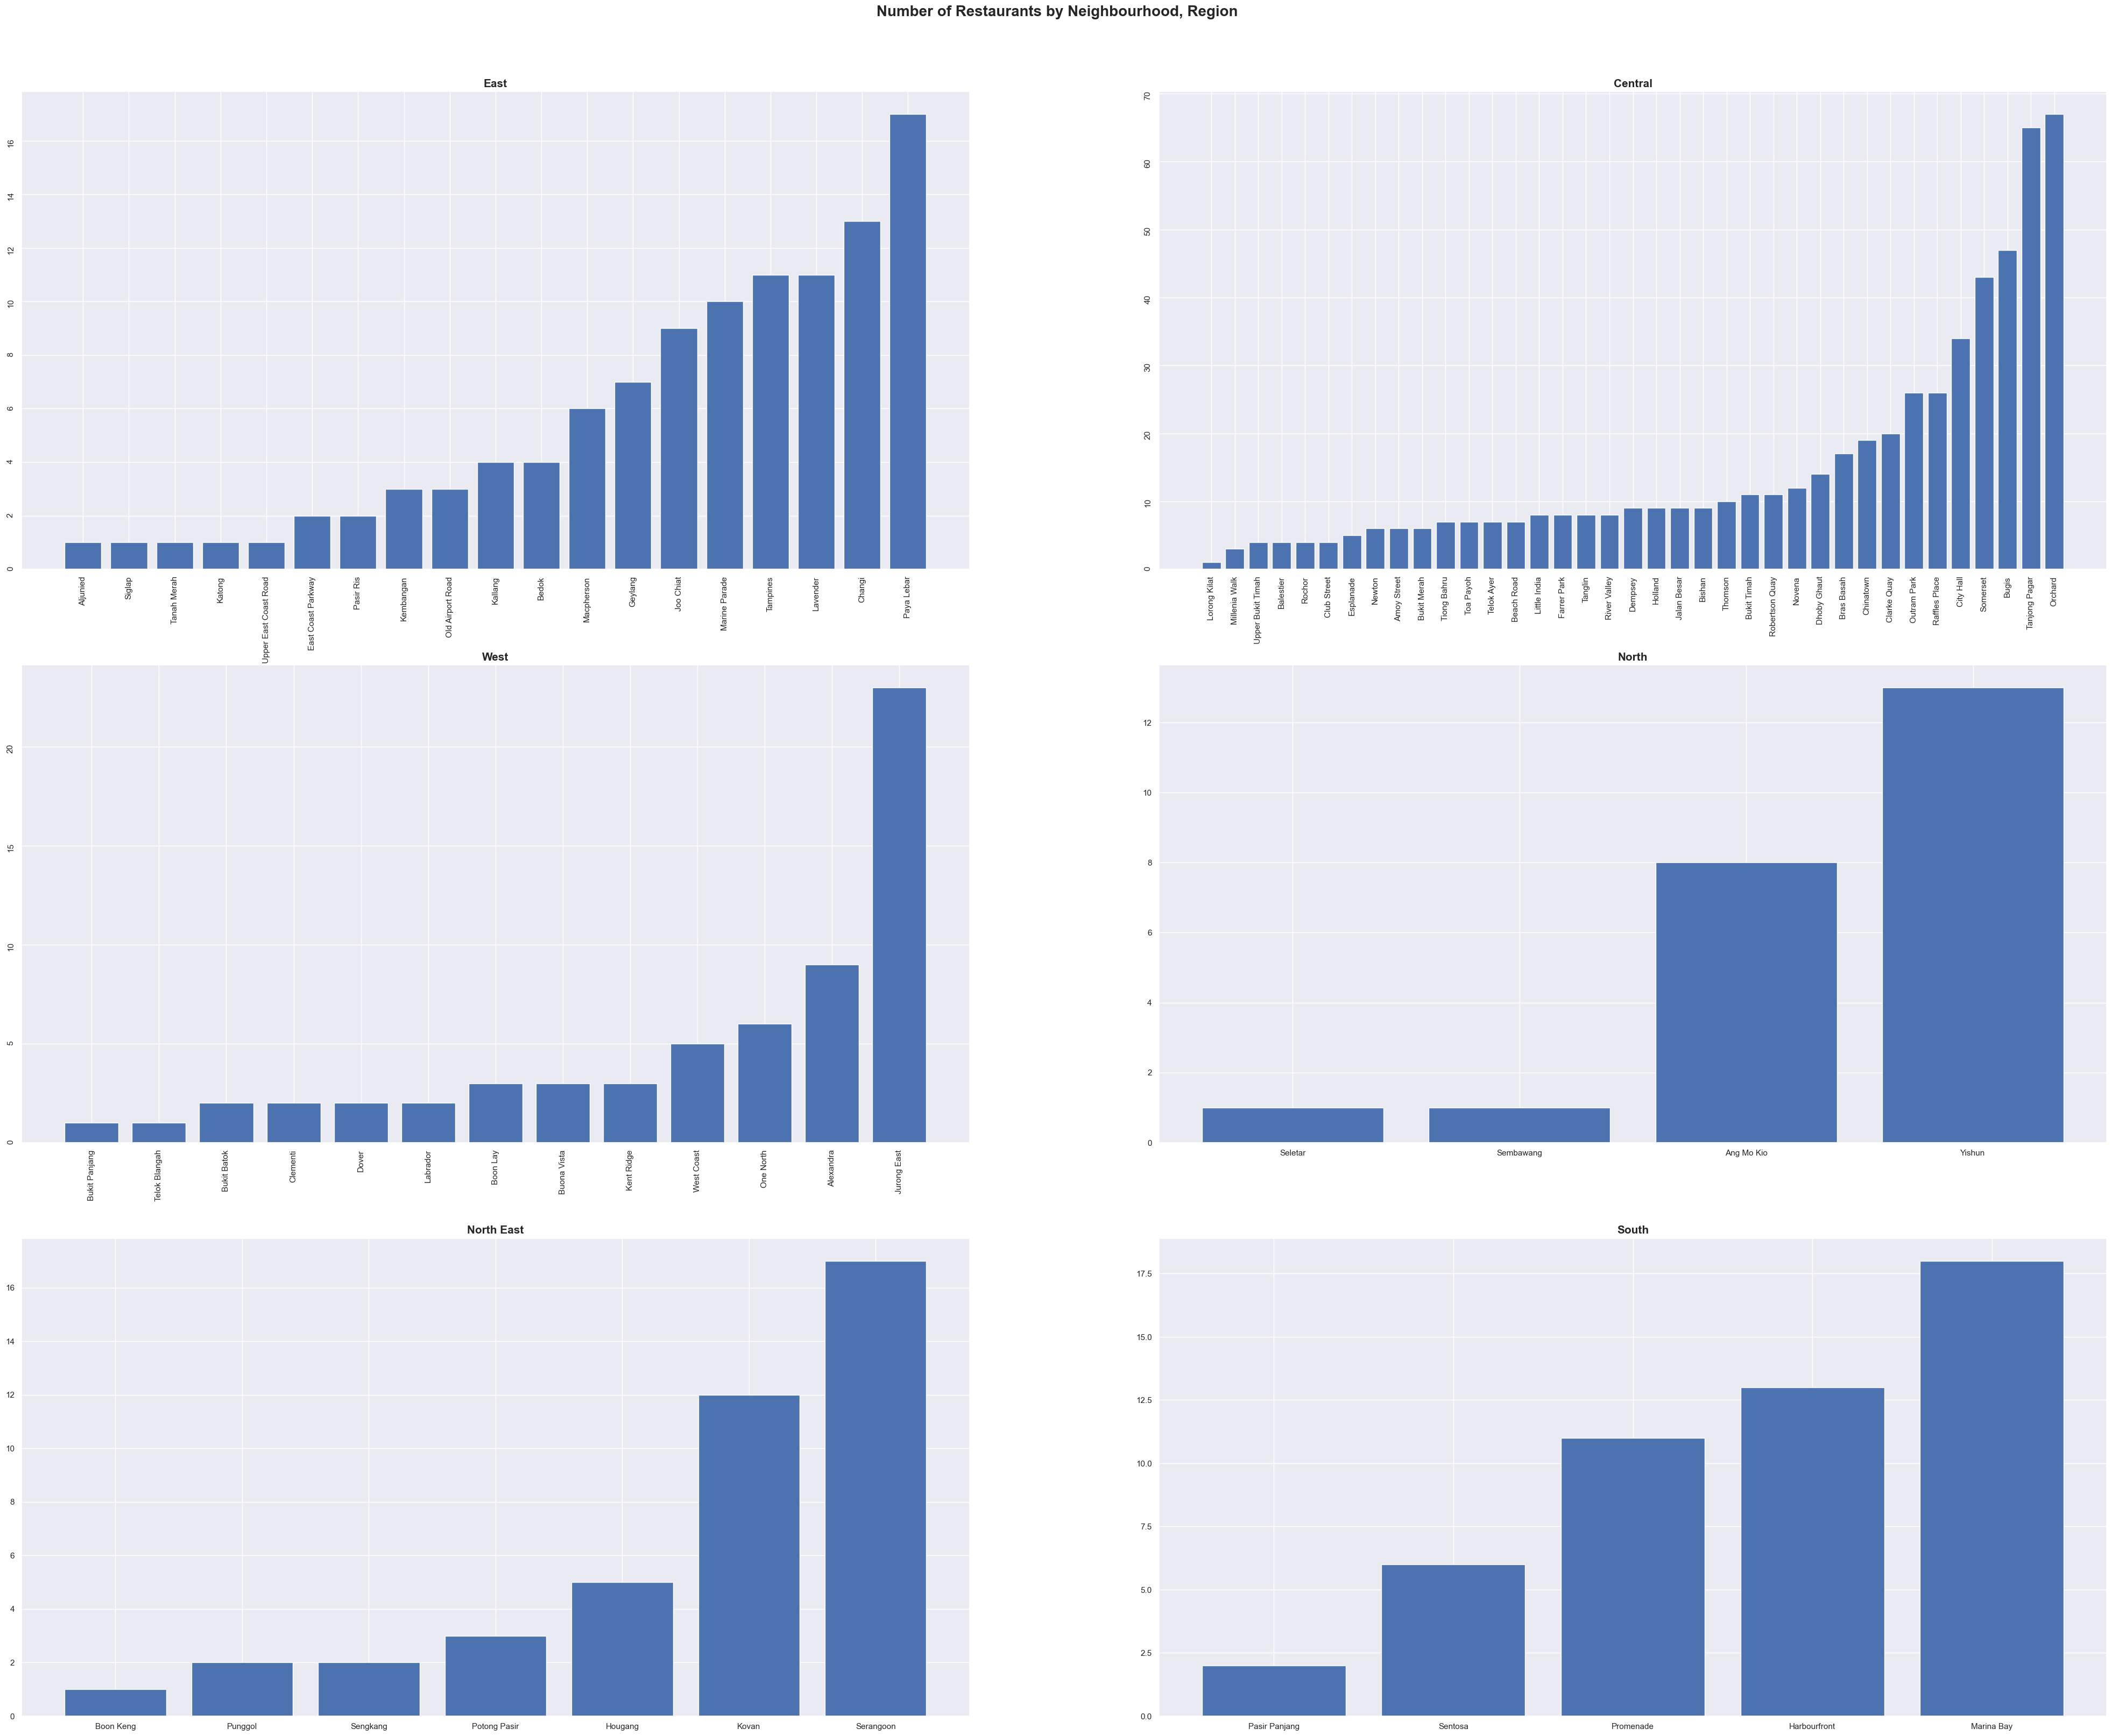

In [25]:

fig, axs = plt.subplots(3,2, figsize=(50, 40))
axs[0][0].bar(num_rest_by_neighbourhood_East['neighbourhood'], num_rest_by_neighbourhood_East['url'])
axs[0][1].bar(num_rest_by_neighbourhood_Central['neighbourhood'], num_rest_by_neighbourhood_Central['url'])
axs[1][0].bar(num_rest_by_neighbourhood_West['neighbourhood'], num_rest_by_neighbourhood_West['url'])
axs[1][1].bar(num_rest_by_neighbourhood_North['neighbourhood'], num_rest_by_neighbourhood_North['url'])
axs[2][0].bar(num_rest_by_neighbourhood_NE['neighbourhood'], num_rest_by_neighbourhood_NE['url'])
axs[2][1].bar(num_rest_by_neighbourhood_South['neighbourhood'], num_rest_by_neighbourhood_South['url'])

fig.suptitle('Number of Restaurants by Neighbourhood, Region', fontsize=20, fontweight='extra bold', y=0.92, x=0.51)
axs[0][0].set_title('East', fontsize=15, fontweight='bold')
axs[0][0].tick_params(labelrotation = 90)

axs[0][1].set_title('Central', fontsize=15, fontweight='bold')
axs[0][1].tick_params(labelrotation = 90)

axs[1][0].set_title('West', fontsize=15, fontweight='bold')
axs[1][0].tick_params(labelrotation = 90)

axs[1][1].set_title('North', fontsize=15, fontweight='bold')
axs[2][0].set_title('North East', fontsize=15, fontweight='bold')
axs[2][1].set_title('South', fontsize=15, fontweight='bold')


#### Bar Chart of Restaurants by Region

In [26]:
num_rest_by_region = pd.DataFrame(cleaned_data.groupby('region')['url'].nunique()).reset_index().sort_values('url')

Text(0.5, 1.0, 'Number of Restaurants by Region')

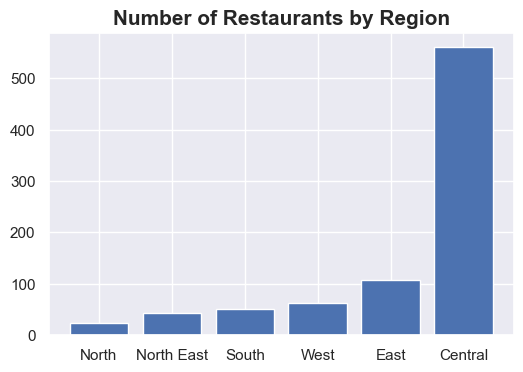

In [27]:
plt.bar(num_rest_by_region['region'],num_rest_by_region['url'])
plt.title('Number of Restaurants by Region', fontsize=15, fontweight='bold')

#### Bar Chart of Reviews by Neighbourhood

In [28]:
num_reviews_by_neighbourhood_East = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'East'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')
num_reviews_by_neighbourhood_Central = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'Central'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')
num_reviews_by_neighbourhood_West = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'West'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')
num_reviews_by_neighbourhood_North= pd.DataFrame(cleaned_data[cleaned_data['region'] == 'North'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')
num_reviews_by_neighbourhood_NE = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'North East'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')
num_reviews_by_neighbourhood_South = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'South'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')

Text(0.5, 1.0, 'South')

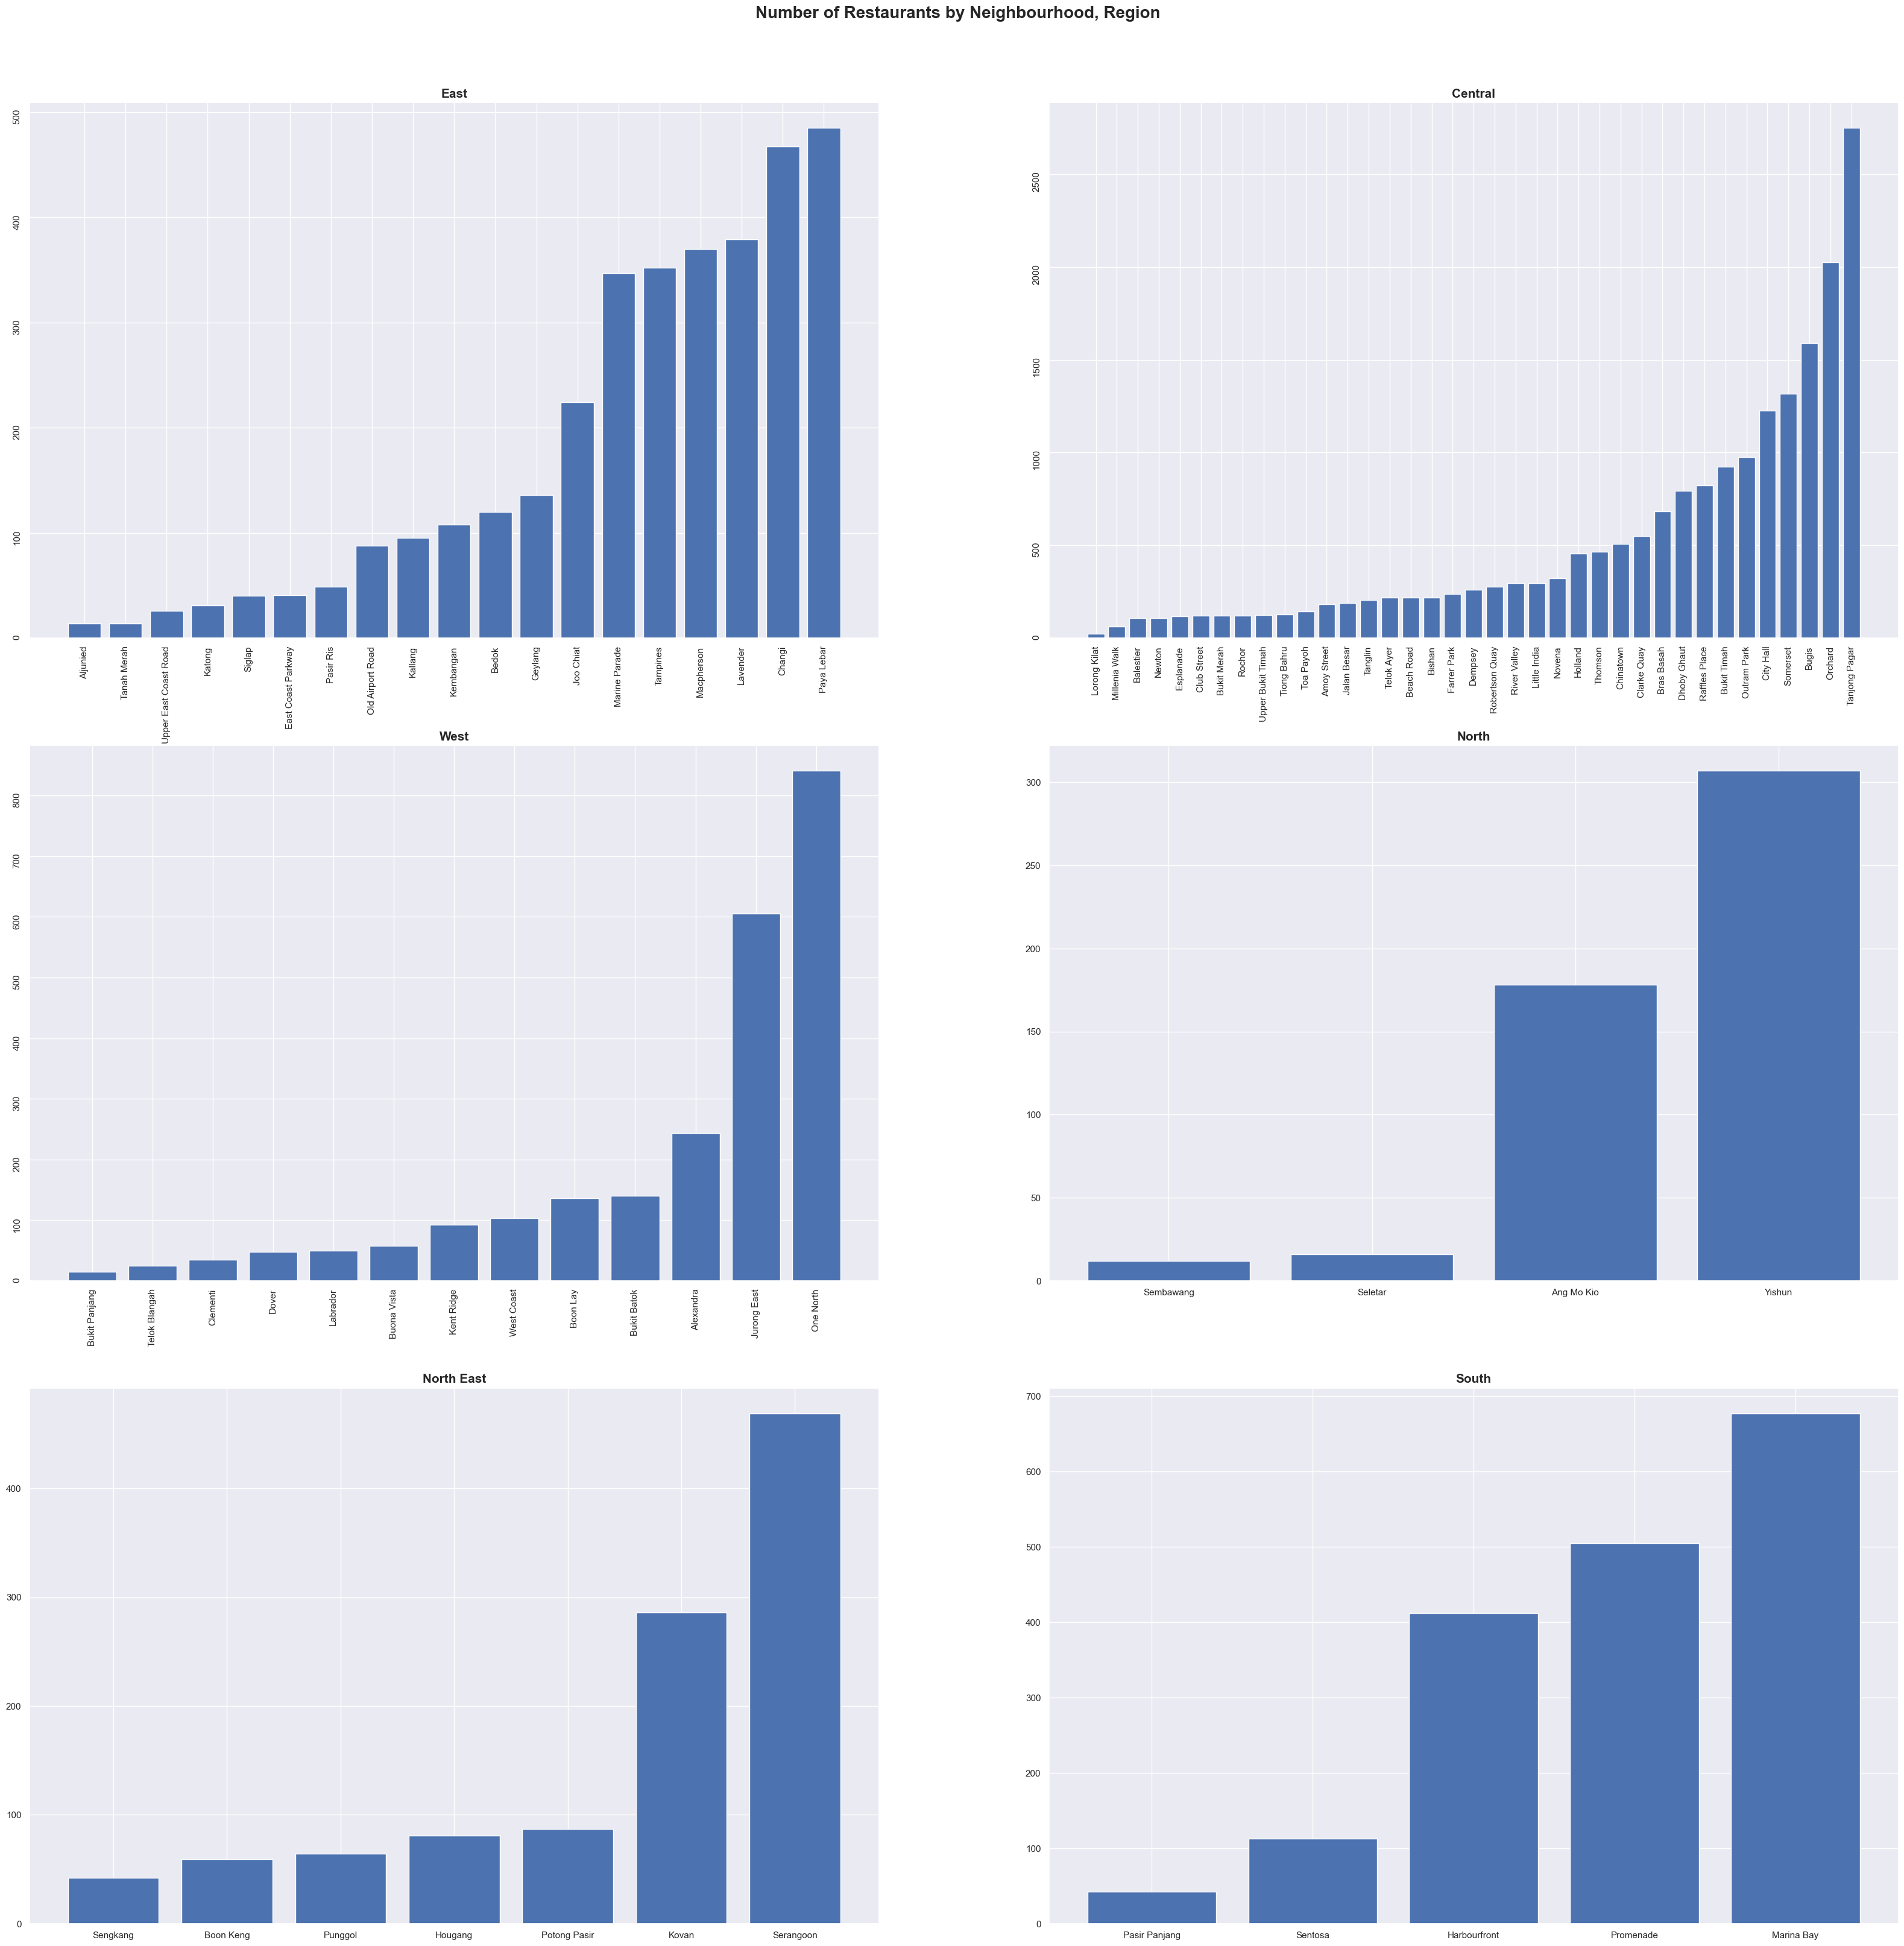

In [29]:
fig, axs = plt.subplots(3,2, figsize=(40, 40))
axs[0][0].bar(num_reviews_by_neighbourhood_East['neighbourhood'], num_reviews_by_neighbourhood_East['url'])
axs[0][1].bar(num_reviews_by_neighbourhood_Central['neighbourhood'], num_reviews_by_neighbourhood_Central['url'])
axs[1][0].bar(num_reviews_by_neighbourhood_West['neighbourhood'], num_reviews_by_neighbourhood_West['url'])
axs[1][1].bar(num_reviews_by_neighbourhood_North['neighbourhood'], num_reviews_by_neighbourhood_North['url'])
axs[2][0].bar(num_reviews_by_neighbourhood_NE['neighbourhood'], num_reviews_by_neighbourhood_NE['url'])
axs[2][1].bar(num_reviews_by_neighbourhood_South['neighbourhood'], num_reviews_by_neighbourhood_South['url'])

fig.suptitle('Number of Restaurants by Neighbourhood, Region', fontsize=20, fontweight='extra bold', y=0.92, x=0.51)
axs[0][0].set_title('East', fontsize=15, fontweight='bold')
axs[0][0].tick_params(labelrotation = 90)

axs[0][1].set_title('Central', fontsize=15, fontweight='bold')
axs[0][1].tick_params(labelrotation = 90)

axs[1][0].set_title('West', fontsize=15, fontweight='bold')
axs[1][0].tick_params(labelrotation = 90)

axs[1][1].set_title('North', fontsize=15, fontweight='bold')
axs[2][0].set_title('North East', fontsize=15, fontweight='bold')
axs[2][1].set_title('South', fontsize=15, fontweight='bold')


#### Bar Chart of Reviews by Region

In [30]:
num_reviews_by_region = pd.DataFrame(cleaned_data.groupby('region')['url'].count()).reset_index().sort_values('url')

Text(0.5, 1.0, 'Number of Reviews by Region')

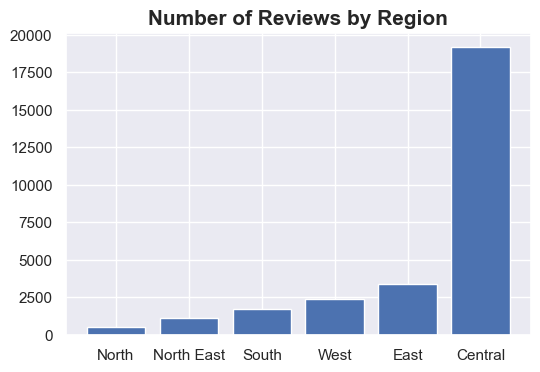

In [31]:
plt.bar(num_reviews_by_region['region'],num_reviews_by_region['url'])
plt.title('Number of Reviews by Region', fontsize=15, fontweight='bold')

#### Bar Chart of Restaurants by Category

In [40]:
rest_cat_df = cleaned_data.iloc[:, cleaned_data.columns.get_loc('cleaned_categories')+1:-1]
rest_cat_df['url'] = cleaned_data['url']


In [41]:
rest_cat_counts = rest_cat_df.drop_duplicates(['url'])
rest_cat_counts = pd.DataFrame(rest_cat_counts.sum()).reset_index().iloc[:-1,:].sort_values(0)

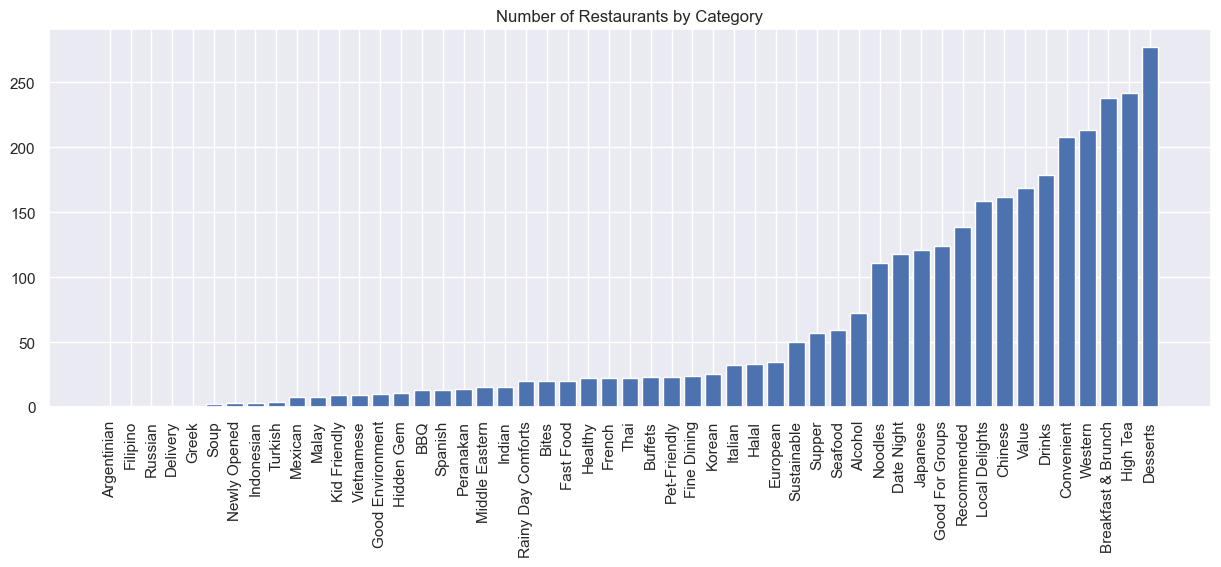

In [43]:
plt.figure(figsize=(15,5))
plt.bar(rest_cat_counts['index'], rest_cat_counts[0])
plt.xticks(rotation = 90)
plt.title('Number of Restaurants by Category')
plt.show()

#### Bar Chart of Reviews by Category

In [46]:
reviews_cat_df = pd.DataFrame(rest_cat_df.sum()).reset_index().iloc[:-1,:].sort_values(0)

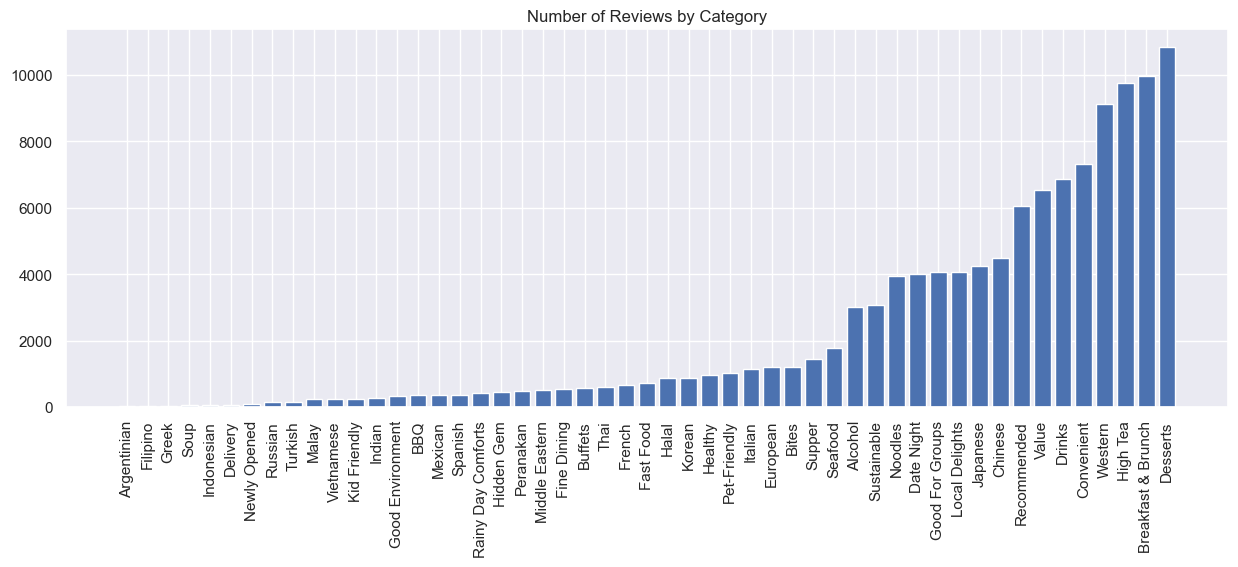

In [48]:
plt.figure(figsize=(15,5))
plt.bar(reviews_cat_df['index'], reviews_cat_df[0])
plt.xticks(rotation = 90)
plt.title('Number of Reviews by Category')
plt.show()

#### Histogram of Number of reviews by Restaurant

In [49]:
num_reviews_by_rest = pd.DataFrame(cleaned_data.groupby('url')['name'].count()).reset_index()

In [51]:
num_reviews_by_rest.describe()

,name
count,845.000000
mean,33.493491
std,32.602177
min,10.000000
25%,16.000000
50%,24.000000
75%,38.000000
max,357.000000


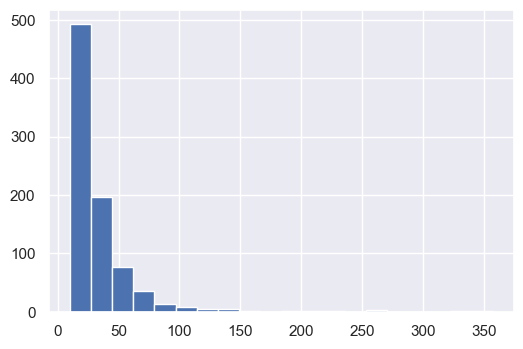

In [69]:
plt.hist(num_reviews_by_rest['name'], bins = 20)
plt.show()

#### Box & Whiskers For Price

In [85]:
box_df = cleaned_data.drop_duplicates('url')

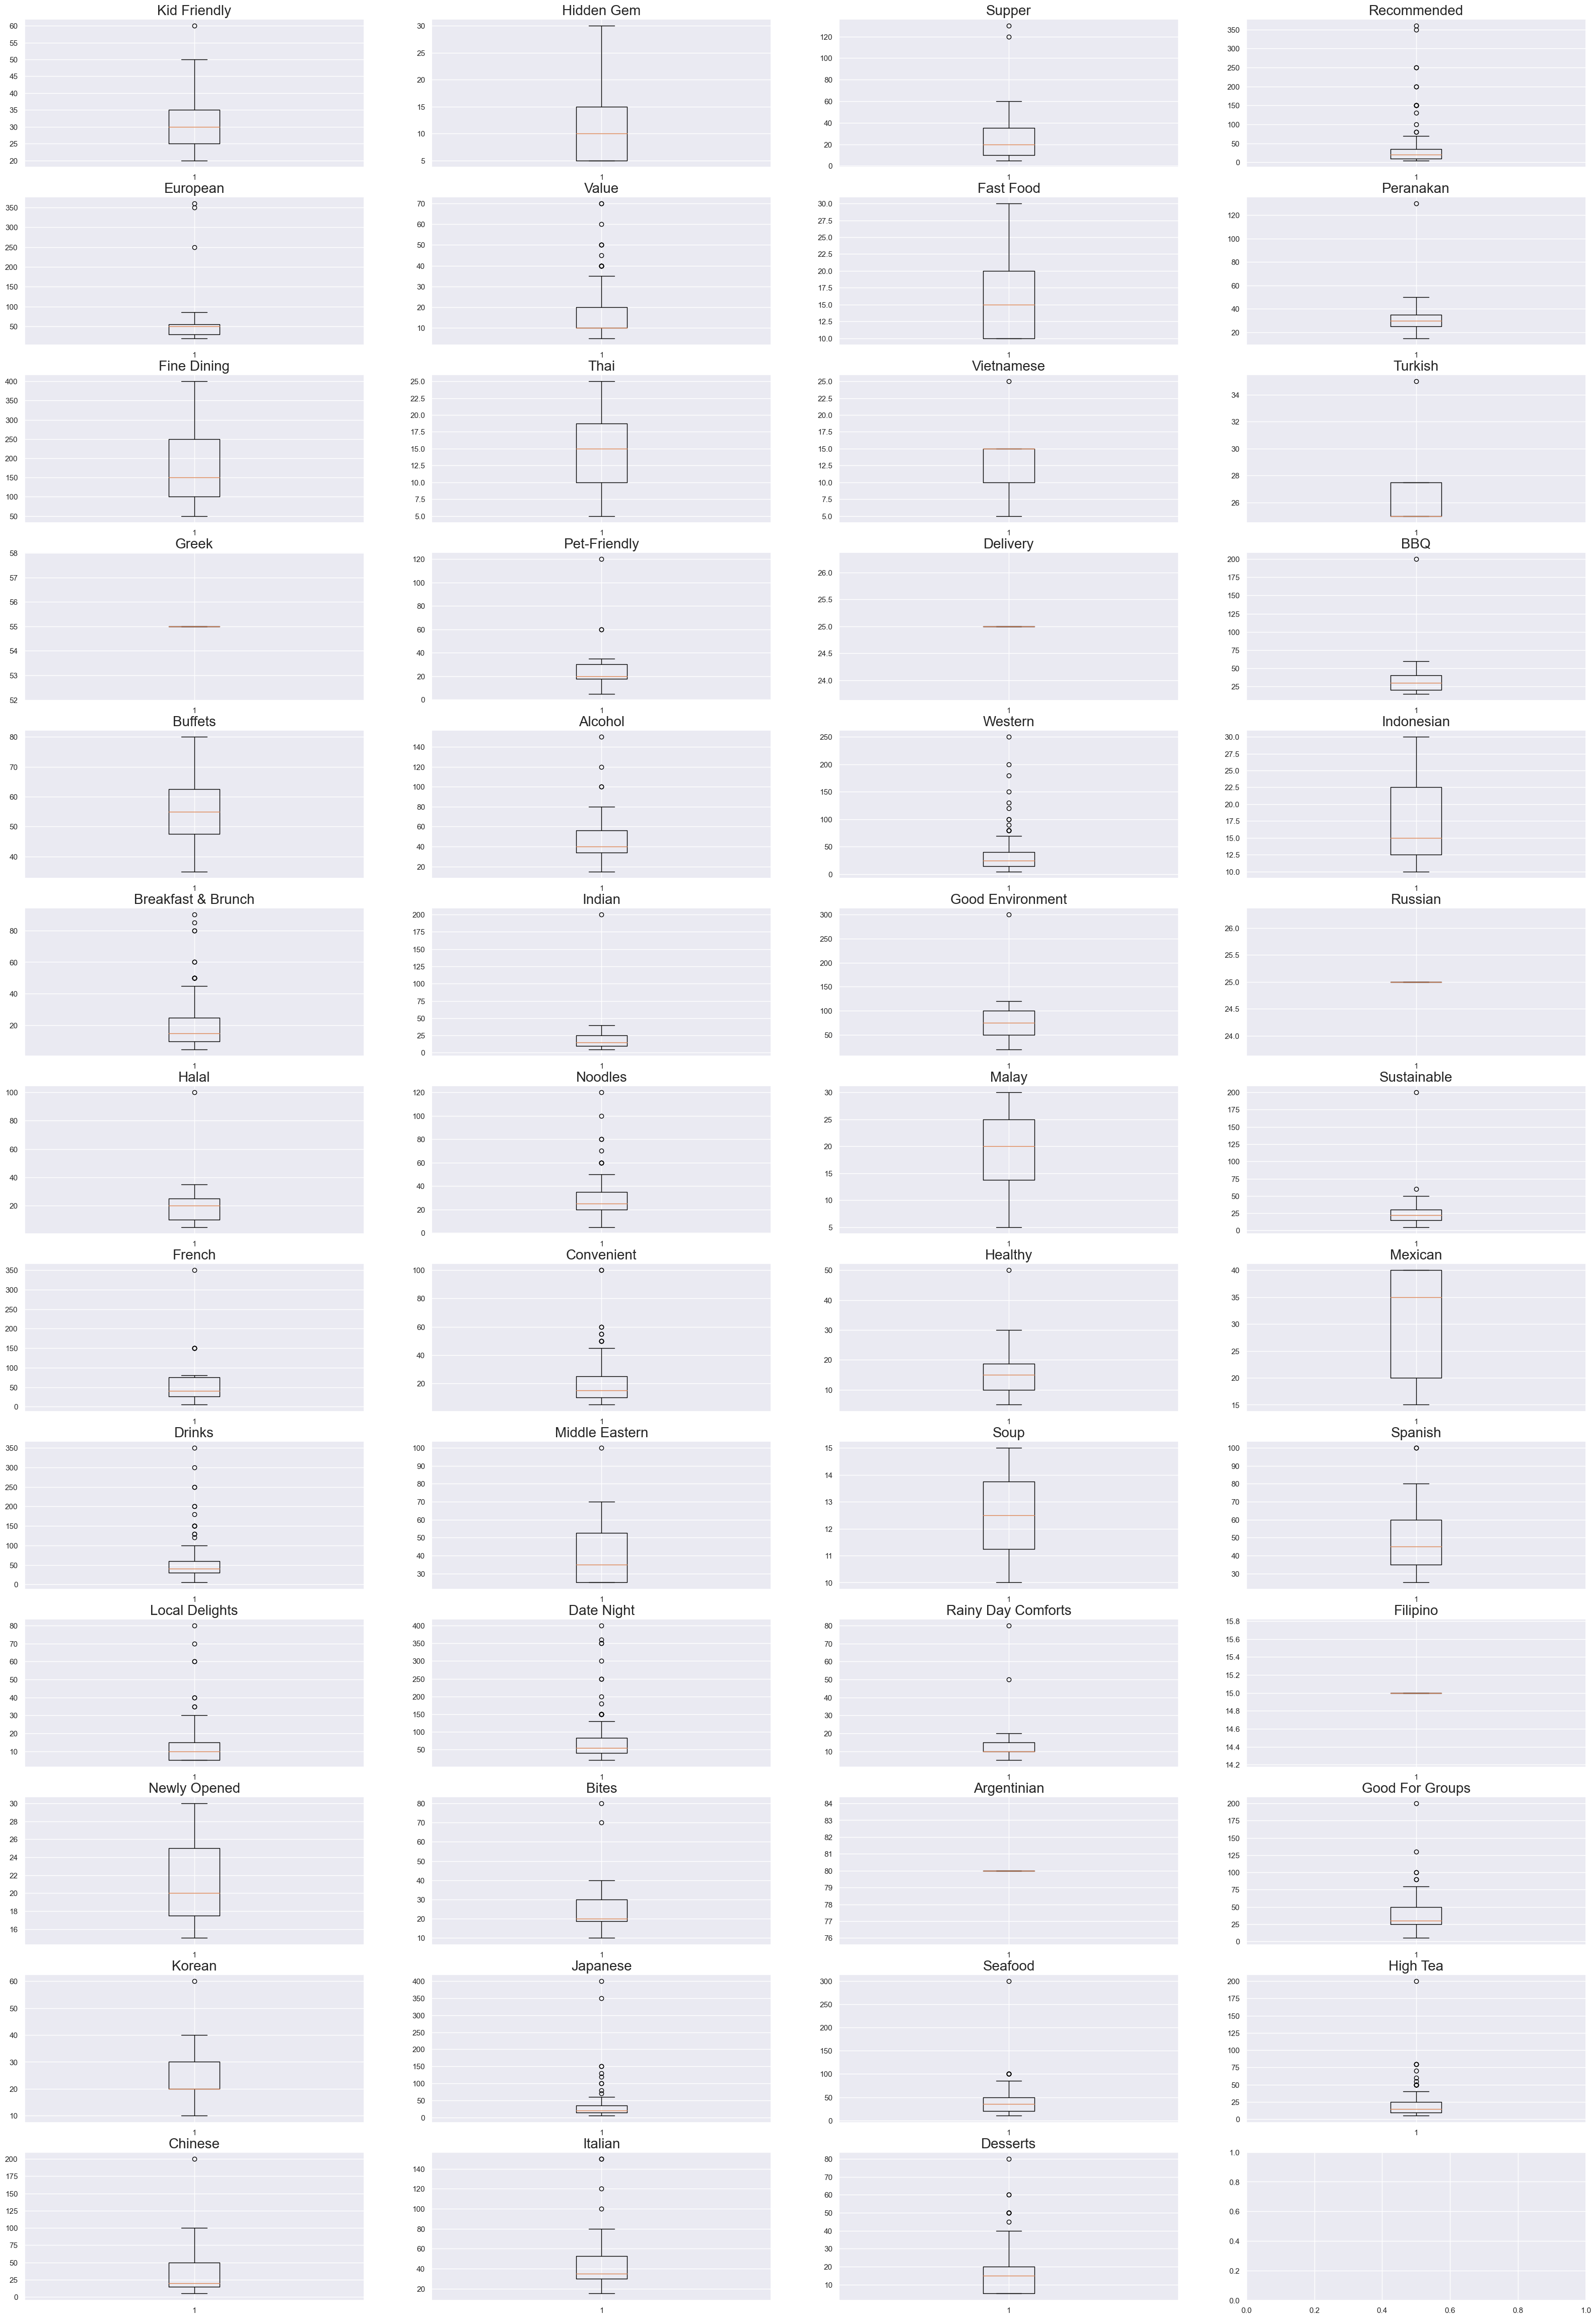

In [102]:
fig, axs = plt.subplots(13,4, figsize=(40, 60))

for index, name in enumerate(list_cleaned_categories):
    cat_df = box_df[box_df[name] == 1]
    axs[index//4,index%4].boxplot(cat_df['cleaned_price'])
    axs[index//4,index%4].set_title(name, fontsize=20)
    


# for i in range(0,4):
#     for j in range(0,13):
#         for category in list_cleaned_categories:
#             cat_df = box_df[box_df[category] == 1]
#             axs[i][j].boxplot(cat_df['cleaned_price'])
            


#### Histogram for Price

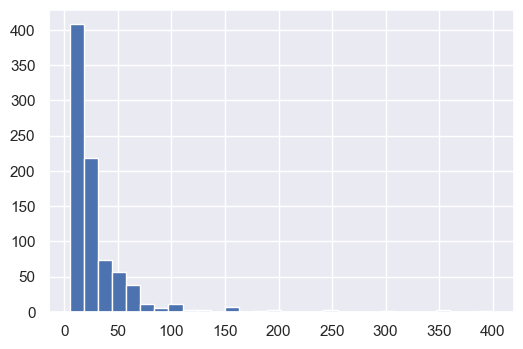

In [111]:
plt.hist(box_df['cleaned_price'], bins = 30) ## find the x limit thing
plt.show()

#### Number of Reviews by Date

In [113]:
from datetime import date, time, datetime
date(year=2023, month=3, day=15)

datetime.date(2023, 3, 14)

In [116]:
import calendar
cal_dict = dict((month, index) for index, month in enumerate(calendar.month_abbr) if month)

In [118]:
cleaned_data

,Unnamed: 0,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,...,Argentinian,Good For Groups,Korean,Japanese,Seafood,High Tea,Chinese,Italian,Desserts,region
0,0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0,...,0,0,0,0,0,0,0,0,0,East
1,1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm,5.0,...,0,0,0,0,0,0,0,0,0,East
2,2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm,5.0,...,0,0,0,0,0,0,0,0,0,East
3,3,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nClassic BBQ wings\nJuicy and tasty like it’s...,Ally Tan,Jul 30 at 4:09pm,5.0,...,0,0,0,0,0,0,0,0,0,East
4,4,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nBBQ stingray\nIt was yummy but slight warnin...,Ally Tan,Jul 30 at 4:08pm,5.0,...,0,0,0,0,0,0,0,0,0,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28297,14,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box D $13.80\n川椒雞柳 | 鮮腐竹蝦球 | 清炒西蘭花 | ...,K T,"Oct 27, 2020",50.0,...,0,1,0,0,0,0,1,0,0,Central
28298,15,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box C $11.80\n普寧豆醬走地雞 | 鮮菌翡翠豆腐 | 蒜茸炒四...,K T,"Oct 26, 2020",50.0,...,0,1,0,0,0,0,1,0,0,Central
28299,16,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box B $11.80\n蒜子豆豉凉瓜黑豬梅肉 | 香菌扒豆腐 | 蒜茸...,K T,"Oct 9, 2020",50.0,...,0,1,0,0,0,0,1,0,0,Central
28300,17,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\n潮州糜 Bento A $12.80\n鹵鴨拼豆干 | 川椒雞 | 欖菜四季苗| 菜脯...,K T,"Oct 1, 2020",50.0,...,0,1,0,0,0,0,1,0,0,Central


In [179]:
cleaned_dates = []
for idx, row in cleaned_data.iterrows():
    dt = row['date'].strip()
    if 'ago' in dt:
        if 'm' in dt or 'h' in dt or 's' in dt:
            cleaned_dates.append(date(2023, 3, 15))
        elif 'week' in dt:
            cleaned_dates.append(date(2023, 3, 8))
        else:
            dt_new = int(dt.replace('d ago', ''))
            dt_new = 15- dt_new
            cleaned_dates.append(date(2023, 3, dt_new))
            
    elif 'at' in dt:
        mth_day = dt.split(' ')
        new_date = date(2023, cal_dict[mth_day[0]], int(mth_day[1]))
        if new_date > date(2023,3,15):
            cleaned_dates.append(date(2022,cal_dict[mth_day[0]], int(mth_day[1])))
        else:
            cleaned_dates.append(date(2023, cal_dict[mth_day[0]], int(mth_day[1])))
    
    else:
        mth_day = dt.split(',')[0].split(' ')
        cleaned_dates.append(date(int(dt.split(',')[-1]), cal_dict[mth_day[0]], int(mth_day[1])))

In [180]:
cleaned_data['cleaned_dates'] = cleaned_dates

In [182]:
dates_df = cleaned_data.groupby('cleaned_dates')['url'].count().reset_index()

In [183]:
dates_df.describe()

,url
count,1169.000000
mean,24.210436
std,20.894800
min,1.000000
25%,14.000000
50%,22.000000
75%,31.000000
max,594.000000


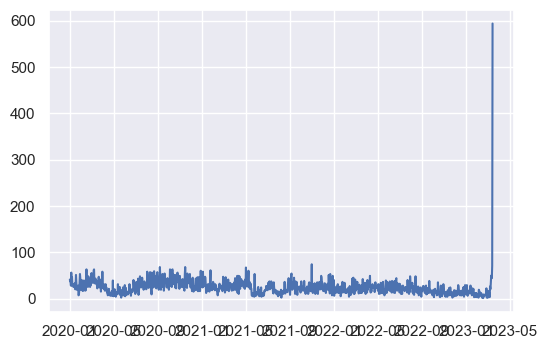

In [184]:
plt.plot(dates_df['cleaned_dates'],dates_df['url'] )